In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
# Reshape data to 2D
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_reshaped)
x_test_scaled = scaler.transform(x_test_reshaped)

# Apply PCA
pca = PCA(n_components=2) # Choose number of components
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

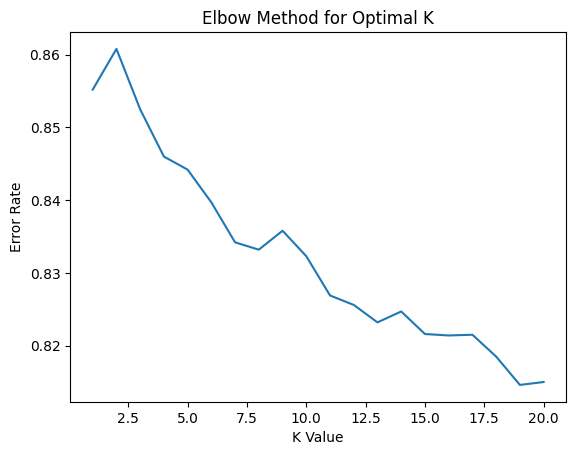

Optimal K: 19


KNeighborsClassifier(n_neighbors=19)

In [ ]:
# Calculate error rates for different k values
error_rates = []
k_values = range(1, 21)  # Try k values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train.ravel())
    y_pred = knn.predict(x_test_pca)
    error_rates.append(np.mean(y_pred != y_test.ravel()))

# Plot the elbow method graph
plt.plot(k_values, error_rates)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the k value at the elbow point
optimal_k = k_values[np.argmin(error_rates)]
print("Optimal K:", optimal_k)

# Train the final KNN model with the optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(x_train_pca, y_train.ravel())

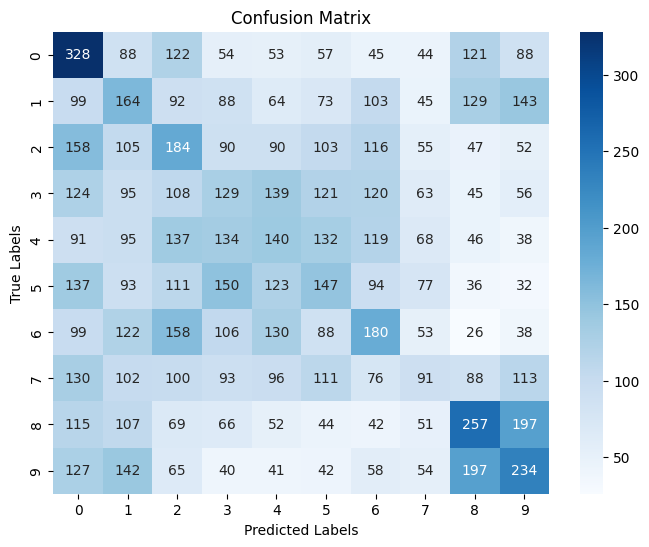

              precision    recall  f1-score   support

           0       0.23      0.33      0.27      1000
           1       0.15      0.16      0.16      1000
           2       0.16      0.18      0.17      1000
           3       0.14      0.13      0.13      1000
           4       0.15      0.14      0.15      1000
           5       0.16      0.15      0.15      1000
           6       0.19      0.18      0.18      1000
           7       0.15      0.09      0.11      1000
           8       0.26      0.26      0.26      1000
           9       0.24      0.23      0.24      1000

    accuracy                           0.19     10000
   macro avg       0.18      0.19      0.18     10000
weighted avg       0.18      0.19      0.18     10000



In [ ]:
# Predict on the test set
y_pred = final_knn.predict(x_test_pca)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report (score sheet)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train_pca, y_train.ravel())

# Predict on the test set
y_pred_rf = rf_model.predict(x_test_pca)

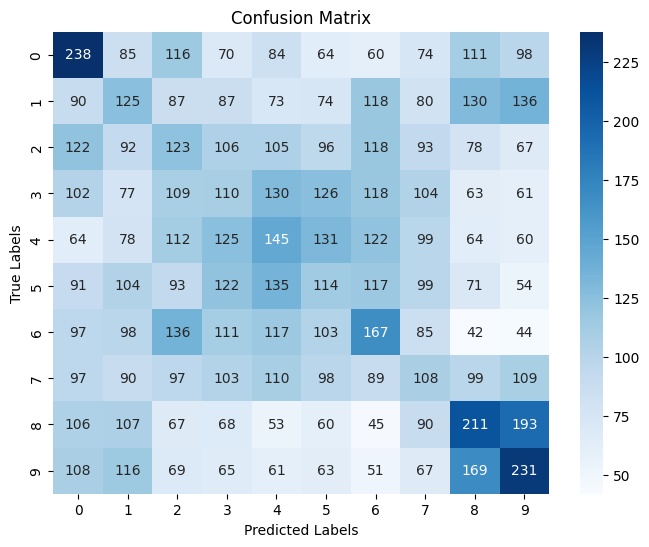

              precision    recall  f1-score   support

           0       0.23      0.33      0.27      1000
           1       0.15      0.16      0.16      1000
           2       0.16      0.18      0.17      1000
           3       0.14      0.13      0.13      1000
           4       0.15      0.14      0.15      1000
           5       0.16      0.15      0.15      1000
           6       0.19      0.18      0.18      1000
           7       0.15      0.09      0.11      1000
           8       0.26      0.26      0.26      1000
           9       0.24      0.23      0.24      1000

    accuracy                           0.19     10000
   macro avg       0.18      0.19      0.18     10000
weighted avg       0.18      0.19      0.18     10000



In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report (score sheet)
report = classification_report(y_test, y_pred)
print(report)